# Assignment 06

## Step 2 Sentiment of Trump & Obama Tweets

In [4]:
import pandas as pd
with open('realDonaldTrump.csv','rb') as f:
    trump_tweets = f.readlines()
    for i in range(len(trump_tweets)):
        trump_tweets[i] = str(trump_tweets[i], 'ascii', errors='ignore')

with open('BarackObama.csv','rb') as f:
    obama_tweets = f.readlines()
    for i in range(len(obama_tweets)):
        obama_tweets[i] = str(obama_tweets[i], 'ascii', errors='ignore')

To each dataframe, add a new column that contains a sentiment polarity score for the tweets (i.e. the strings in the "text" columns). Use VADER's SentimentIntensityAnalyzer to get the sentiment scores


In [5]:
from nltk.sentiment import vader
sia = vader.SentimentIntensityAnalyzer()
def getSentiment(review):
    return sia.polarity_scores(review)['compound']

### Obama Tweets 

In [6]:
obama = pd.DataFrame({'Review':obama_tweets, 'Polarity':1})
obama.head()

,Review,Polarity
0,"created_at,text,url,replies,retweets,favorites...",1
1,"10/16/17 22:59,""I'm grateful to @SenJohnMcCain...",1
2,"10/2/17 12:41,Michelle &amp; I are praying for...",1
3,"9/30/17 2:22,Proud to cheer on Team USA at the...",1
4,"9/26/17 17:03,""We're expanding our efforts to ...",1


In [7]:
dobama = pd.concat([obama], ignore_index=True)

In [8]:
dobama['ObamaSentiment'] = [getSentiment(review) for review in dobama['Review']]

In [9]:
dobama.head()

,Review,Polarity,ObamaSentiment
0,"created_at,text,url,replies,retweets,favorites...",1,0.0000
1,"10/16/17 22:59,""I'm grateful to @SenJohnMcCain...",1,0.8834
2,"10/2/17 12:41,Michelle &amp; I are praying for...",1,0.0516
3,"9/30/17 2:22,Proud to cheer on Team USA at the...",1,0.8934
4,"9/26/17 17:03,""We're expanding our efforts to ...",1,0.5994


### Trump Tweets 

In [10]:
trump = pd.DataFrame({'Review':trump_tweets, 'Polarity':1})
trump.head()

,Review,Polarity
0,"created_at,text,url,replies,retweets,favorites...",1
1,"10/23/17 12:30,""I had a very respectful conver...",1
2,"10/23/17 11:53,""Two dozen NFL players continue...",1
3,"10/23/17 11:42,""There will be NO change to you...",1
4,"10/22/17 12:08,""It is finally sinking through....",1


In [11]:
dtrump = pd.concat([trump], ignore_index=True)

In [12]:
dtrump['TrumpSentiment'] = [getSentiment(review) for review in dtrump['Review']]

In [13]:
dtrump.head()

,Review,Polarity,TrumpSentiment
0,"created_at,text,url,replies,retweets,favorites...",1,0.0000
1,"10/23/17 12:30,""I had a very respectful conver...",1,0.5551
2,"10/23/17 11:53,""Two dozen NFL players continue...",1,-0.6476
3,"10/23/17 11:42,""There will be NO change to you...",1,0.6439
4,"10/22/17 12:08,""It is finally sinking through....",1,-0.8599


### Comparing Trump and Obama Tweets 

#### Calculating the mean and standard deviation of the sentiment scores for each dataframe


In [14]:
dtrump['TrumpSentiment'].mean()

0.13789334982987933

In [15]:
dobama['ObamaSentiment'].mean()

0.18836683291770573

In [16]:
dtrump['TrumpSentiment'].std()

0.5162848318527068

In [17]:
dobama['ObamaSentiment'].std()

0.37158275461461066

#### Making a histogram plot showing the distribution of sentiment scores for each dataframe


<AxesSubplot:>

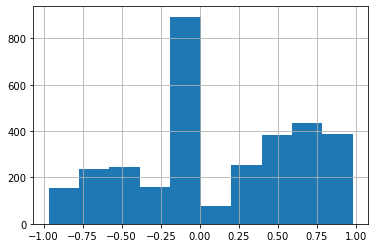

In [18]:
dtrump.loc[dtrump['Polarity']==1, 'TrumpSentiment'].hist()

<AxesSubplot:>

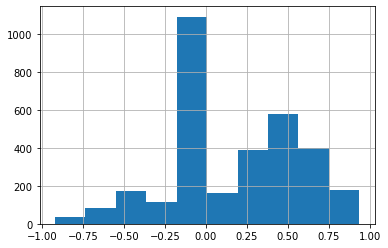

In [19]:
dobama.loc[dobama['Polarity']==1, 'ObamaSentiment'].hist()

#### Printing examples of the most positively and most negatively scored tweets from each dataframe 


In [20]:
trumppos = dtrump.loc[(dtrump['Polarity']==1) & (dtrump['TrumpSentiment']>0),'Review']
trumppos.head()

1    10/23/17 12:30,"I had a very respectful conver...
3    10/23/17 11:42,"There will be NO change to you...
5    10/22/17 12:02,"Wacky Congresswoman Wilson is ...
7    10/22/17 0:09,"...2nd Amendment, Strong Milita...
8    10/22/17 0:02,"...9 months than this Administr...
Name: Review, dtype: object

In [21]:
obamapos = dobama.loc[(dobama['Polarity']==1) & (dobama['ObamaSentiment']>0),'Review']
obamapos.head()

1    10/16/17 22:59,"I'm grateful to @SenJohnMcCain...
2    10/2/17 12:41,Michelle &amp; I are praying for...
3    9/30/17 2:22,Proud to cheer on Team USA at the...
4    9/26/17 17:03,"We're expanding our efforts to ...
5    9/25/17 23:36,"Prosecutor, soldier, family man...
Name: Review, dtype: object

In [22]:
trumpneg = dtrump.loc[(dtrump['Polarity']==1) & (dtrump['TrumpSentiment']<0),'Review']
trumpneg.head()

2     10/23/17 11:53,"Two dozen NFL players continue...
4     10/22/17 12:08,"It is finally sinking through....
9     10/21/17 23:57,"I agree getting Tax Cuts appro...
10    10/21/17 22:51,"Just out, but lightly reported...
12    10/21/17 20:06,"Keep hearing about ""tiny"" am...
Name: Review, dtype: object

In [23]:
obamaneg = dobama.loc[(dobama['Polarity']==1) & (dobama['ObamaSentiment']<0),'Review']
obamaneg.head()

10    9/11/17 15:32,We remember everyone we lost on ...
14    9/5/17 18:52,"To target hopeful young strivers...
18    8/13/17 0:06,"""People must learn to hate, and...
19    8/13/17 0:06,"""No one is born hating another ...
20    7/20/17 0:49,"John McCain is an American hero ...
Name: Review, dtype: object

#### Commenting on how the two sets differ


Trump has more negative tweets compared to Obama however he has a higher standard deviation compared to Obama. Overall, Trump does have a lower Sentient Score mean which implies that he posts more positive tweets. 

#### Conclude by commenting on where you think VADER does a good job and where it may have some shortcomings.


I think VADER does a good job at analyzing large datasets and it's a very easy approach to understand: assign a score to each word to evaluate the overall intensity of a sentence. However, some of the shortcomings is that it can misinterpret sarcasm or irony or tone in general. For example, one of the negative tweets in Obama is "“People must learn to hate, and if they can learn to hate, they can be taught to love, for love comes more naturally to the human heart than its opposite". Although it uses the word hate, the purpose of the tweet is to redirect those towards love. In this case, we can see how it can misevaluate a tweet. 

## Step 3 Topic Modeling of Trump & Obama Tweets

Use gensim and LDA to perform topic modeling on the tweets of each dataframe.
Use at least two different numbers of topics to explore the variation
Use at least two different numbers of passes when training the LDA model



In [24]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from string import punctuation

In [25]:
myStopWords = list(punctuation) + stopwords.words('english')

### Obama

In [26]:
obamapd = dobama.loc[(dobama['Polarity']==1),'Review']

In [27]:
docs = []
for i in obamapd:
    docs.append([w for w in word_tokenize(i.lower()) if w not in myStopWords])
docs[0]

['created_at', 'text', 'url', 'replies', 'retweets', 'favorites', 'user']

In [36]:
from nltk.stem.porter import PorterStemmer
#from nltk.stem import LancasterStemmer 
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

docs_stemmed = []
for i in docs:
    docs_stemmed.append([p_stemmer.stem(w) for w in i])
    
docs_stemmed[0]

['created_at', 'text', 'url', 'repli', 'retweet', 'favorit', 'user']

In [28]:
from gensim import corpora, models
import gensim

In [37]:
dictionary = corpora.Dictionary(docs_stemmed)

In [38]:
dictionary.filter_extremes(no_below=10, no_above=0.5)
# could also trim with keep_n=1000 or similar to keep only the top words

In [39]:
print(dictionary.token2id)

{'retweet': 0, "''": 1, "'m": 2, "'s": 3, '``': 4, 'countri': 5, 'servic': 6, 'year': 7, 'amp': 8, 'anoth': 9, 'everyon': 10, 'famili': 11, 'michel': 12, 'thought': 13, 'best': 14, 'friend': 15, 'game': 16, 'proud': 17, 'team': 18, 'today': 19, "'re": 20, '17:03': 21, 'american': 22, 'effort': 23, 'expand': 24, 'fellow': 25, 'help': 26, 'join': 27, 'need': 28, 'right': 29, 'us': 30, 'better': 31, 'leav': 32, 'made': 33, 'want': 34, 'address': 35, 'presid': 36, 'rt': 37, 'start': 38, 'tune': 39, 'think': 40, 'tonight': 41, 'everi': 42, 'import': 43, 'kid': 44, 'make': 45, 'sure': 46, 'thank': 47, 'work': 48, 'chang': 49, 'inspir': 50, 'peopl': 51, 'world': 52, 'act': 53, 'ever': 54, 'honor': 55, '15:56': 56, 'across': 57, 'answer': 58, 'call': 59, 'u.s.': 60, 'futur': 61, 'hope': 62, 'mind': 63, 'young': 64, 'alway': 65, '18:52': 66, 'done': 67, 'noth': 68, 'statement': 69, 'first': 70, 'stand': 71, '...': 72, 'come': 73, 'love': 74, 'learn': 75, 'must': 76, 'one': 77, 'person': 78, "'v

In [40]:
corpus = [dictionary.doc2bow(text) for text in docs]

In [41]:
print(corpus[20])

[(1, 1), (3, 1), (4, 1), (8, 1), (22, 1), (54, 1), (77, 1), (79, 1), (80, 1), (81, 1), (82, 1)]


In [42]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, 
                                           num_topics=20, 
                                           id2word = dictionary, 
                                           passes=5)

#### For each scenario, print the key words for each topic, and comment on whether they make any sense

In [43]:
ldamodel.show_topics(num_topics=20)

[(0,
  '0.120*"support" + 0.071*"movement" + 0.057*"show" + 0.053*"american" + 0.044*"put" + 0.041*"trade" + 0.035*"deal" + 0.034*"grow" + 0.028*"play" + 0.027*"save"'),
 (1,
  '0.082*"\'s" + 0.081*"new" + 0.058*"pay" + 0.054*"equal" + 0.042*"know" + 0.034*"work" + 0.029*"high" + 0.029*"year" + 0.029*"let" + 0.027*"stronger"'),
 (2,
  '0.092*"get" + 0.089*"sotu" + 0.076*"way" + 0.074*"action" + 0.050*"ofa" + 0.042*"internet" + 0.041*"vp" + 0.036*"took" + 0.035*"share" + 0.034*"talk"'),
 (3,
  '0.190*"health" + 0.148*"care" + 0.093*"ofa" + 0.064*"\'s" + 0.052*"join" + 0.050*"reform" + 0.048*"team" + 0.037*"get" + 0.025*"today" + 0.024*"truth"'),
 (4,
  '0.087*"\'s" + 0.073*"obama" + 0.067*"america" + 0.056*"could" + 0.052*"icymi" + 0.047*"need" + 0.041*"budget" + 0.039*"big" + 0.032*"pass" + 0.029*"win"'),
 (5,
  '0.071*"act" + 0.070*"\'s" + 0.058*"\'re" + 0.058*"tonight" + 0.055*"full" + 0.052*"open" + 0.038*"obama" + 0.038*"chip" + 0.036*"protect" + 0.034*"nation"'),
 (6,
  '0.096*"do

In [46]:
print(ldamodel.show_topics(num_topics=20, num_words=20)[7])
print(i[1])
print('\n')

print(ldamodel.show_topics(num_topics=20, num_words=20)[3])
print(i[1])
print('\n')

(7, '0.379*"\'\'" + 0.047*"obama" + 0.042*"work" + 0.038*"women" + 0.038*"\'re" + 0.034*"\'s" + 0.031*"\'ve" + 0.028*"make" + 0.027*"got" + 0.023*"get" + 0.019*"hard" + 0.018*"fair" + 0.017*"let" + 0.016*"sure" + 0.015*"real" + 0.013*"men" + 0.013*"day" + 0.012*"keep" + 0.011*"done" + 0.011*"know"')
16:50


(3, '0.190*"health" + 0.148*"care" + 0.093*"ofa" + 0.064*"\'s" + 0.052*"join" + 0.050*"reform" + 0.048*"team" + 0.037*"get" + 0.025*"today" + 0.024*"truth" + 0.019*"word" + 0.019*"stay" + 0.019*"spread" + 0.016*"card" + 0.012*"two" + 0.010*"retweet" + 0.010*"cost" + 0.009*"18:48" + 0.009*"million" + 0.009*"20:58"')
16:50




The seventh topic seems to be about gender while the third topic seems to be about healthcare. The key words seem semi related asin both cases, however, there are some outlier words that I believe can be applied to any topic. 

### Trump Tweets

In [47]:
trumppd = dtrump.loc[(dtrump['Polarity']==1),'Review']

In [48]:
docs = []
for i in trumppd:
    docs.append([w for w in word_tokenize(i.lower()) if w not in myStopWords])
docs[0]

['created_at', 'text', 'url', 'replies', 'retweets', 'favorites', 'user']

In [49]:
from nltk.stem.porter import PorterStemmer
#from nltk.stem import LancasterStemmer 
# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

docs_stemmed = []
for i in docs:
    docs_stemmed.append([p_stemmer.stem(w) for w in i])
    
docs_stemmed[0]

['created_at', 'text', 'url', 'repli', 'retweet', 'favorit', 'user']

In [50]:
from gensim import corpora, models
import gensim

In [52]:
dictionary = corpora.Dictionary(docs_stemmed)
dictionary.filter_extremes(no_below=10, no_above=0.5)
# could also trim with keep_n=1000 or similar to keep only the top words
print(dictionary.token2id)

{'12:30': 0, '``': 1, 'begin': 2, 'david': 3, 'la': 4, 'name': 5, 'respect': 6, 'spoke': 7, 'without': 8, 'amp': 9, 'anthem': 10, 'continu': 11, 'countri': 12, 'disrespect': 13, 'flag': 14, 'leadership': 15, 'nation': 16, 'nfl': 17, 'player': 18, 'show': 19, 'total': 20, 'two': 21, 'alway': 22, 'chang': 23, 'class': 24, 'great': 25, 'middl': 26, 'popular': 27, 'stay': 28, 'tax': 29, 'work': 30, 'believ': 31, 'even': 32, 'fabric': 33, 'fake': 34, 'final': 35, 'lost': 36, 'major': 37, 'news': 38, 'peopl': 39, 'stori': 40, 'wors': 41, 'action': 42, 'dem': 43, 'disast': 44, 'give': 45, 'keep': 46, 'parti': 47, 'r': 48, 'republican': 49, 'vote': 50, 'watch': 51, '10:00': 52, 'a.m.': 53, 'enjoy': 54, 'foxnew': 55, 'interview': 56, 'today': 57, '...': 58, 'court': 59, 'histor': 60, 'isi': 61, 'justic': 62, 'market': 63, 'militari': 64, 'record': 65, 'stock': 66, 'strong': 67, 'suprem': 68, '....': 69, '50': 70, 'administr': 71, 'approv': 72, 'border': 73, 'cut': 74, 'energi': 75, 'freedom': 7

In [53]:
corpus = [dictionary.doc2bow(text) for text in docs]

In [54]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, 
                                           num_topics=20, 
                                           id2word = dictionary, 
                                           passes=5)

#### For each scenario, print the key words for each topic, and comment on whether they make any sense

In [55]:
ldamodel.show_topics(num_topics=20)

[(0,
  '0.077*"ohio" + 0.066*"tomorrow" + 0.046*"look" + 0.043*"great" + 0.036*"forward" + 0.034*"state" + 0.032*"amp" + 0.030*"thank" + 0.024*"dishonest" + 0.021*"``"'),
 (1,
  '0.113*"makeamericagreatagain" + 0.103*"way" + 0.041*"``" + 0.035*"erictrump" + 0.033*"1:28" + 0.033*"vote" + 0.031*"must" + 0.027*"system" + 0.025*"taken" + 0.022*"met"'),
 (2,
  '0.135*"``" + 0.056*"n\'t" + 0.029*"bill" + 0.026*"know" + 0.025*"cnn" + 0.023*"lost" + 0.020*"russia" + 0.020*"great" + 0.019*"nice" + 0.019*"right"'),
 (3,
  '0.148*"draintheswamp" + 0.065*"time" + 0.063*"tonight" + 0.058*"enjoy" + 0.055*"\'s" + 0.045*"donald" + 0.042*"trump" + 0.042*"see" + 0.037*"vote" + 0.034*"win"'),
 (4,
  '0.070*"amp" + 0.069*"``" + 0.048*"repeal" + 0.048*"much" + 0.048*"never" + 0.032*"even" + 0.028*"time" + 0.025*"come" + 0.024*"30" + 0.019*"n\'t"'),
 (5,
  '0.111*"north" + 0.060*"carolina" + 0.046*"korea" + 0.042*"iowa" + 0.040*"american" + 0.034*"china" + 0.029*"thank" + 0.028*"trade" + 0.028*"``" + 0.021*

In [57]:
print(ldamodel.show_topics(num_topics=20, num_words=20)[7])
print(i[1])
print('\n')

print(ldamodel.show_topics(num_topics=20, num_words=20)[19])
print(i[1])
print('\n')

(7, '0.069*"back" + 0.052*"``" + 0.046*"need" + 0.034*"border" + 0.032*"tax" + 0.030*"strong" + 0.027*"fight" + 0.025*"want" + 0.025*"us" + 0.025*"order" + 0.023*"take" + 0.021*"bring" + 0.020*"one" + 0.018*"amp" + 0.016*"rt" + 0.016*"stand" + 0.015*".." + 0.014*"air" + 0.014*"big" + 0.014*"proud"')
15:19


(19, '0.175*"clinton" + 0.100*"``" + 0.044*"rt" + 0.042*"said" + 0.032*"obama" + 0.030*"talk" + 0.025*"say" + 0.023*"total" + 0.020*"news" + 0.019*"sad" + 0.019*"donaldjtrumpjr" + 0.018*"gave" + 0.017*"trump" + 0.017*"lie" + 0.016*"told" + 0.015*"cnn" + 0.015*"worst" + 0.014*"never" + 0.014*"former" + 0.012*"..."')
15:19




The seventh topic seems to be about borders and tax while the nineteenth topic seems to be about previous politicians. The words do make sense: in the seventh topic, there is a big emphasis on American pride. In the nineteenth topic, there's a lot of words that are associated with describing politicians.

### Choose the topic model that seems most interesting to you, and use it to compare the topics found for Trump vs those found for Obama


I noticed that the topics for Trump seem to be more negative and are pretty representative of his America first platform. There is a lot of nationalistic words with greater frequency and mention to America and its post politicians. Obama on the other hand has a lot of focus on health and jobs, with less frequent mention